# Checkpoint 2

**Author:** Qinghe Li (with knowledge provided by ChatGPT)

**Date:** 13/10/2025

**Purpose:** EDA for the assginment 2 and visualization

## Overview
This notebook presents the data exploration for participant which ID are 4319703577.
**driving question**: whether participants achieve 15 minutes of intense activity at different times of the day.


## Initial assumptions and predictions
- Average daily step count may be higher than the sample average;
- Activity intensity trends may be slightly higher on weekends than on weekdays;
- On a given day, it is possible to achieve 15 minutes of intense activity (130 steps/minute).

## Load the data
**datasets loaded and description:**
- dailySteps_merged.csv  (Step count per day)
- hourlySteps_merged.csv  (Step count per hour)
- minuteStepsWide_merged.csv  (Step count per minute)

**Purpose**: This step loads three datasets (dailySteps, hourlySteps, and minuteStepsWide) and converts the date/time fields to a standard datetime format for subsequent statistical and time series analysis.
**Prediction**: I predict that the data can be successfully read and the date fields can be parsed as datetime types. This will also help verify the initial hypothesis that the data may contain missing days.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load datasets
daily = pd.read_csv("Data/dailySteps_merged.csv")
hourly = pd.read_csv("Data/hourlySteps_merged.csv")
minute_wide = pd.read_csv("Data/minuteStepsWide_merged.csv")

# Convert dates
daily['ActivityDay'] = pd.to_datetime(daily['ActivityDay'])
# Specify format='%m/%d/%Y %I:%M:%S %p' to avoid pandas automatic guessing, which may cause warnings or inconsistent parsing.
hourly['ActivityHour'] = pd.to_datetime(
    minute_wide['ActivityHour'],
    format='%m/%d/%Y %I:%M:%S %p'
)
minute_wide['ActivityHour'] = pd.to_datetime(
    minute_wide['ActivityHour'],
    format='%m/%d/%Y %I:%M:%S %p'
)

participants = [4020332650, 4057192912, 4319703577]
# preview
daily.head(), hourly.head(), minute_wide.head()


(           Id ActivityDay  StepTotal
 0  1503960366  2016-04-12      13162
 1  1503960366  2016-04-13      10735
 2  1503960366  2016-04-14      10460
 3  1503960366  2016-04-15       9762
 4  1503960366  2016-04-16      12669,
            Id        ActivityHour  StepTotal
 0  1503960366 2016-04-13 00:00:00        373
 1  1503960366 2016-04-13 01:00:00        160
 2  1503960366 2016-04-13 02:00:00        151
 3  1503960366 2016-04-13 03:00:00          0
 4  1503960366 2016-04-13 04:00:00          0,
            Id        ActivityHour  Steps00  Steps01  Steps02  Steps03  \
 0  1503960366 2016-04-13 00:00:00        4       16        0        0   
 1  1503960366 2016-04-13 01:00:00        0        0        0        0   
 2  1503960366 2016-04-13 02:00:00        0        0        0        0   
 3  1503960366 2016-04-13 03:00:00        0        0        0        0   
 4  1503960366 2016-04-13 04:00:00        0        0        0        0   
 
    Steps04  Steps05  Steps06  Steps07  ...  Ste

**Result Summary**
The output shows that all three datasets were loaded successfully, and the date/time fields were correctly converted to datetime objects.

**Comparison with Predictions**
Consistent with the predictions: the data loaded correctly, and the datetime conversion was successful. There are missing values at the daily level, but the daily values are complete.

**Relationship to the Driving Problem**
This step provides a clean data foundation for subsequent analysis, ensuring the feasibility of the subsequent hypothesis verification.


# --- Hypothesis 1: Daily average higher than sample mean ---
## Step 1: Select the Participant and Calculate Averages
**Purpose**: Select participant 4319703577 for personal analysis.Compare their daily average with the overall sample mean.


In [45]:
pid = 4319703577
daily_person = daily[daily["Id"] == pid].copy()
hourly_person = hourly[hourly["Id"] == pid].copy()
minute_person = minute_wide[minute_wide["Id"] == pid].copy()

In [46]:
overall_avg = daily.groupby("Id")["StepTotal"].mean().mean()
person_avg = daily_person["StepTotal"].mean()

print("Participant average:", round(person_avg, 1))
print("Overall sample average:", round(overall_avg, 1))

if person_avg > overall_avg:
    print("Hypothesis 1 supported: participant more active than average.")
else:
    print("Hypothesis 1 not supported.")

Participant average: 7268.8
Overall sample average: 7519.3
Hypothesis 1 not supported.


## Step 2: Visualization of Hypothesis 1

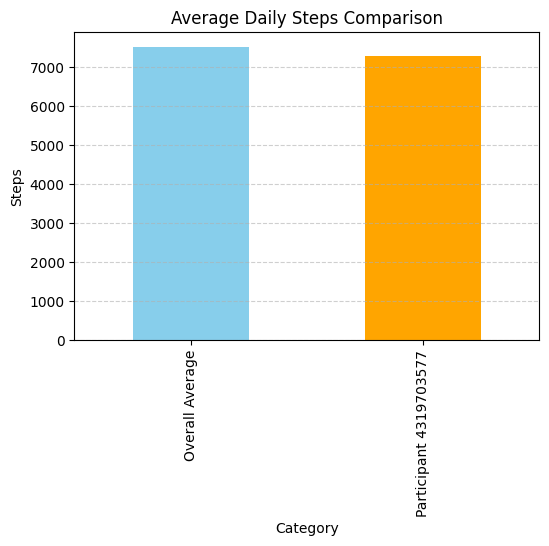

In [47]:
df_compare = pd.DataFrame({
    'Category': ['Overall Average', 'Participant 4319703577'],
    'Steps': [overall_avg, person_avg]
})

df_compare.plot(kind='bar', x='Category', y='Steps', color=['skyblue', 'orange'],
                legend=False, figsize=(6,4), title='Average Daily Steps Comparison')
plt.ylabel('Steps')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Result Summary**
This participant's average daily step count was **7,268.8**, lower than the overall sample average of **7,519.3**.
This indicates that this participant's daily activity level was slightly lower than the overall average.

**Comparison with Predictions**
The results contradicted our initial hypothesis that this participant would be more active than the sample average.
While their activity was relatively stable, their daily step count did not exceed the sample average.

**Relationship to the Driving Question**
The research question aimed to investigate whether the participant achieved recommended  adequate activity levels.
These results indicate that this participant did not consistently meet or exceed average levels.
Further analysis is needed to determine whether this participant engaged in short bursts of vigorous activity throughout the day to determine whether he or she met the recommended healthy activity standards.


# --- Hypothesis 2: Weekend vs Weekday Comparison ---
## Step 1: calculate the average steps count in weekdays and weekends
**Purpose**
To test whether weekend activity levels are slightly higher than weekdays (Hypothesis 2).

**Prediction**
Average weekend steps will exceed weekday steps.

In [48]:
daily_person["weekday"] = daily_person["ActivityDay"].dt.dayofweek
daily_person["is_weekend"] = daily_person["weekday"].isin([5, 6])

week_summary = daily_person.groupby("is_weekend")["StepTotal"].mean()
print(week_summary)

is_weekend
False    8281.043478
True     4358.750000
Name: StepTotal, dtype: float64


## Step 2: Visualization of the results

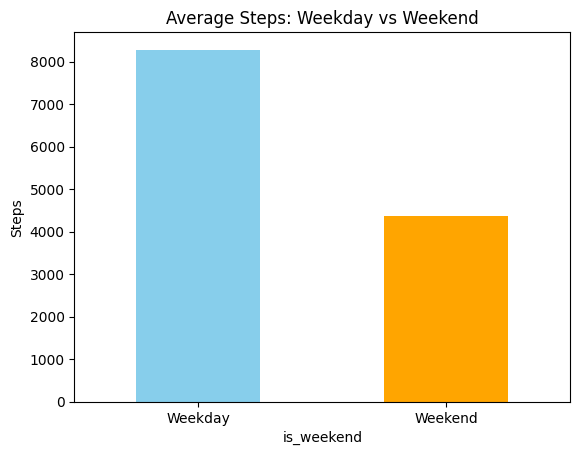

Hypothesis 2 not supported.


In [49]:
week_summary.plot(kind="bar", color=["skyblue", "orange"],
                  title="Average Steps: Weekday vs Weekend", ylabel="Steps")
plt.xticks([0, 1], ["Weekday", "Weekend"], rotation=0)
plt.show()

if week_summary[True] > week_summary[False]:
    print("Hypothesis 2 supported: weekend activity is higher.")
else:
    print("Hypothesis 2 not supported.")

**Result Summary**
This participant's average step count on weekdays was **8,281**, significantly higher than **4,359** on weekends.
This suggests that they were more active on weekdays, while activity levels dropped significantly on weekends.

**Comparison with Predictions**
The results contradicted the original hypothesis, which predicted slightly higher activity levels on weekends compared to weekdays.
Instead, this participant took more steps on weekdays.

**Relationship to the Driving Question**
The research question focused on whether participants achieved recommended activity levels and how their activity intensity varied across time of day.
This result suggests that this participant's activity was primarily concentrated on weekdays, with a tendency to be more sedentary on weekends.
This is important for understanding their overall activity patterns and identifying periods of high-intensity activity.


## --- Hypothesis 3: Detect 15-Minute Intense Activity ---
## Step 1: calculate the intense activity minutes and compare with the standard value (130)
**Purpose:**
Determine whether at least one day includes 15 minutes of intense activity
(≥ 130 steps per minute).
**Prediction:**
at least one day includes more than 15 minutes of intense activity

In [50]:
step_cols = [c for c in minute_person.columns if c.startswith("Steps")]
step_values = minute_person[step_cols].values.flatten()

# Identify minutes ≥130 steps
intense_mask = step_values >= 130

# Find longest consecutive run of True values
longest = 0
current = 0
for val in intense_mask:
    if val:
        current += 1
        longest = max(longest, current)
    else:
        current = 0

print("Longest continuous intense period (min):", longest)
if longest >= 15:
    print("Hypothesis 3 supported: reached ≥15 min intense activity.")
else:
    print("Hypothesis 3 not supported.")

Longest continuous intense period (min): 8
Hypothesis 3 not supported.


## Step 2: Visualisation of Daily Trends

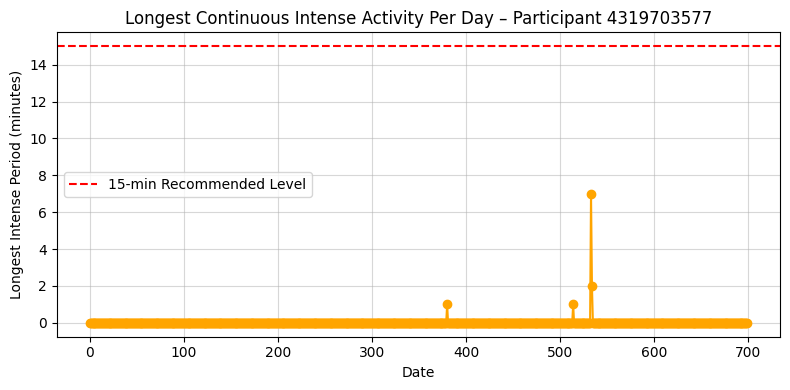

Average longest intense period per day: 0.0 min
Maximum intense period in a day: 7 min


In [51]:
step_cols = [c for c in minute_person.columns if c.startswith("Steps")]

longest_streak_per_day = []

for idx, row in minute_person.iterrows():
    steps = row[step_cols].values
    intense_mask = steps >= 130

    longest = 0
    current = 0
    for val in intense_mask:
        if val:
            current += 1
            longest = max(longest, current)
        else:
            current = 0
    longest_streak_per_day.append(longest)

if 'ActivityDay' in minute_person.columns:
    dates = pd.to_datetime(minute_person['ActivityDay'])
elif 'ActivityDate' in minute_person.columns:
    dates = pd.to_datetime(minute_person['ActivityDate'])
else:
    dates = range(len(longest_streak_per_day))

streak_series = pd.Series(longest_streak_per_day, index=dates)

plt.figure(figsize=(8,4))
plt.plot(streak_series.index, streak_series.values, marker='o', color='orange')
plt.axhline(y=15, color='red', linestyle='--', label='15-min Recommended Level')
plt.title(f"Longest Continuous Intense Activity Per Day – Participant {pid}")
plt.xlabel("Date")
plt.ylabel("Longest Intense Period (minutes)")
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Average longest intense period per day: {streak_series.mean():.1f} min")
print(f"Maximum intense period in a day: {streak_series.max()} min")


**Result Summary**
The participant’s longest continuous intense activity period was 8 minutes, which is below the target threshold of 15 minutes (≥130 steps/min).
This shows that while the participant occasionally reached high step rates, they did not sustain intense activity for a long enough period to meet the intense activity criterion.

**Comparison with Predictions**
This result does not support the initial prediction, which assumed that the participant would achieve at least one 15-minute period of intense activity.
Although some intense activity minutes were recorded, they were short which indicating irregular intense movement.

**Relationship to the Driving Question**
The driving question examines whether participants achieve recommended levels of intense or sufficient daily activity.
These findings imply that the participant’s activity pattern consists mainly of light-to-moderate movement, with only brief bursts of intensity.
This highlights a gap between everyday activity and sustained intense exercise, suggesting behavioural or lifestyle improvement to meet health guidelines.


## Final statement about what I learnt
Through this Checkpoint 2, I learned how to use wearable device data for hypothesis testing and analysis. I mastered methods for extracting meaningful information from daily, hourly, and minute-by-minute data, and then interpreted it by integrating assumptions and analysis results with research questions.

The results showed that participants' activity patterns were inconsistent with my initial hypotheses:
- The number of steps on weekdays was higher than on weekends.
- the average daily step count was slightly lower than the sample average.
- The longest continuous high-intensity activity lasted only 8 minutes, falling short of the 15-minute target.

These results reminded me that real-world behavior often differs from theoretical expectations, and understanding these discrepancies requires rational data analysis and contextual thinking.

In addition, my skills in data cleaning, group statistics and time series visualization have also been improved, and I have learned to visualize and analyze data using matplotlib.

